In [1]:
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras import Sequential
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.mobilenet import MobileNet

In [2]:
model = MobileNet(input_shape=(227, 227, 1), dropout=0.2, include_top=True,\
                  weights=None, classes=1, classifier_activation='sigmoid' ,pooling='max')

In [3]:
model.summary()

Model: "mobilenet_1.00_227"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 1)]     0         
                                                                 
 conv1 (Conv2D)              (None, 114, 114, 32)      288       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 114, 114, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 114, 114, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 114, 114, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 114, 114, 32)     128       
 ation)                                         

In [4]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=5, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=5,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [5]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [7]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 28s 247ms/step - loss: 0.6349 - binary_accuracy: 0.6587 - val_loss: 0.7723 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 21s 237ms/step - loss: 0.4554 - binary_accuracy: 0.7855 - val_loss: 1.1062 - val_binary_accuracy: 0.4947
Epoch 3/100
89/89 [==============================] - 21s 235ms/step - loss: 0.3497 - binary_accuracy: 0.8423 - val_loss: 1.4251 - val_binary_accuracy: 0.4947
Epoch 4/100
89/89 [==============================] - 21s 233ms/step - loss: 0.2430 - binary_accuracy: 0.8948 - val_loss: 1.7818 - val_binary_accuracy: 0.4947
Epoch 5/100
89/89 [==============================] - 21s 239ms/step - loss: 0.1892 - binary_accuracy: 0.9245 - val_loss: 1.8116 - val_binary_accuracy: 0.4947
Epoch 6/100
89/89 [==============================] - 22s 241ms/step - loss: 0.1272 - binary_accuracy: 0.9504 - val_loss: 1.6842 - val_binary_accuracy: 0.4947


In [8]:
epochs_run=len(history.epoch)

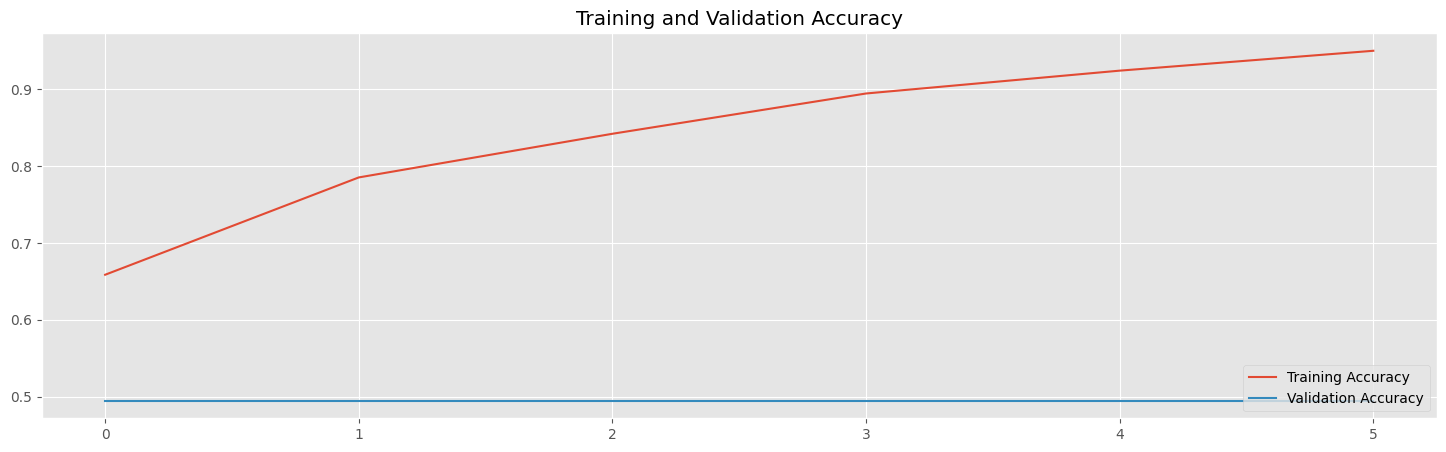

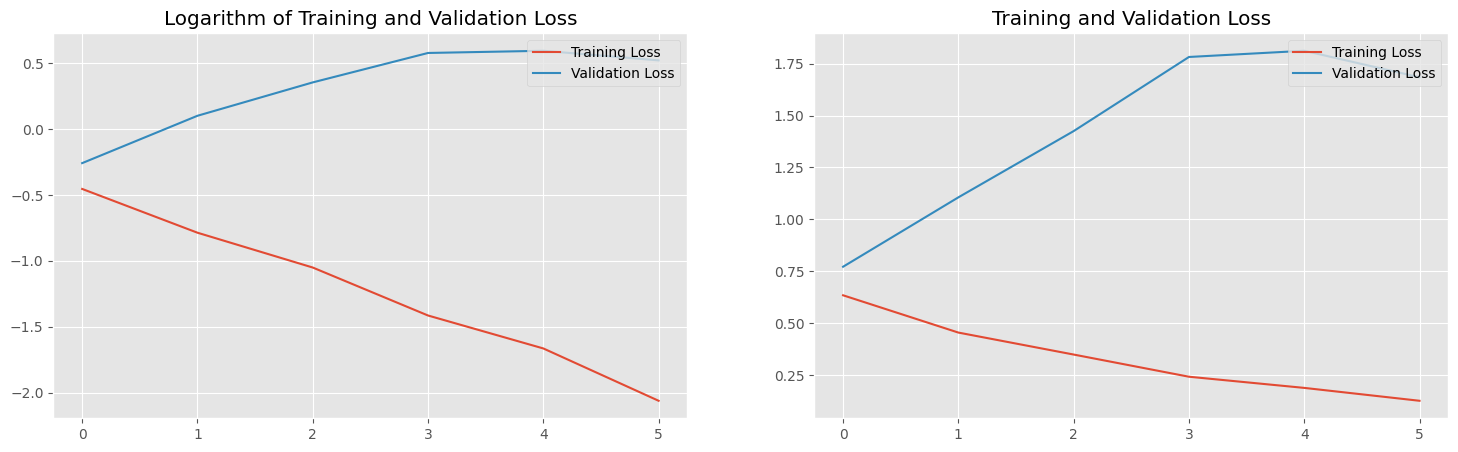

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [10]:
results = model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 1s 44ms/step - loss: 1.8601 - binary_accuracy: 0.4444
test loss, test acc: [1.8601164817810059, 0.4444444477558136]


In [11]:
# model.save("../models/mobilenet_0_ultrasound")